Step 1: Import Libraries


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
from sklearn.tree import plot_tree


Step 2: Generate the Moons Dataset


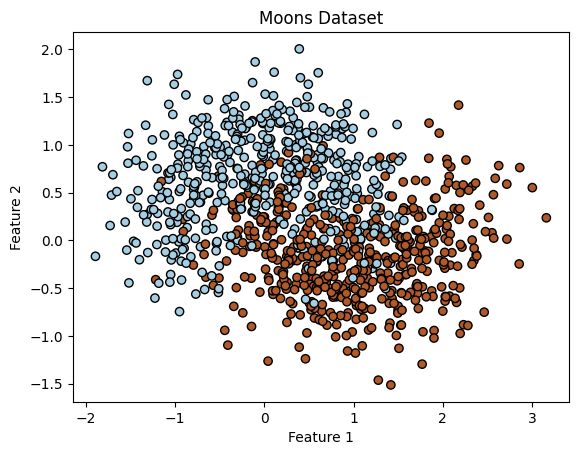

In [48]:
# Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Step 3: Split the Data into Training and Test Sets


In [49]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 4: Perform Grid Search with Cross-Validation


In [50]:
# Define hyperparameter grid
param_grid = {'max_leaf_nodes': list(range(2, 50))}

# Create a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameter value
best_params = grid_search.best_params_
print(f"Best max_leaf_nodes: {best_params['max_leaf_nodes']}")


Best max_leaf_nodes: 6


Step 5: Train the Decision Tree with Best Parameters


In [74]:
# Train the model with the best max_leaf_nodes
best_tree = DecisionTreeClassifier(max_leaf_nodes=best_params['max_leaf_nodes'], random_state=42)
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=6, random_state=42)

Step 6: Evaluate Model Performance


In [73]:
# Make predictions
y_pred = best_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2%}")

Test Set Accuracy: 85.50%


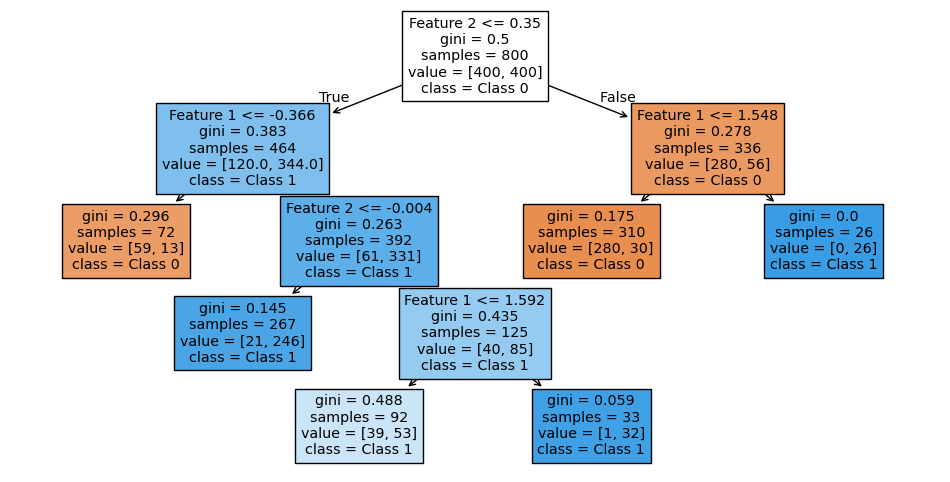

In [71]:
plt.figure(figsize=(12, 6))
plot_tree(best_tree, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"])
plt.show()


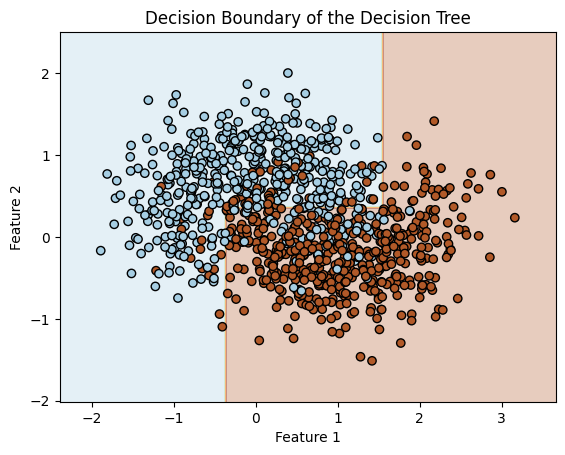

In [54]:
# Функція для побудови кордонів рішення
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
    plt.title("Decision Boundary of the Decision Tree")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Виклик функції для візуалізації
plot_decision_boundary(best_tree, X, y)


In [55]:
tree_rules = export_text(best_tree, feature_names=["Feature 1", "Feature 2"])
print(tree_rules)

|--- Feature 2 <= 0.35
|   |--- Feature 1 <= -0.37
|   |   |--- class: 0
|   |--- Feature 1 >  -0.37
|   |   |--- Feature 2 <= -0.00
|   |   |   |--- class: 1
|   |   |--- Feature 2 >  -0.00
|   |   |   |--- Feature 1 <= 1.59
|   |   |   |   |--- class: 1
|   |   |   |--- Feature 1 >  1.59
|   |   |   |   |--- class: 1
|--- Feature 2 >  0.35
|   |--- Feature 1 <= 1.55
|   |   |--- class: 0
|   |--- Feature 1 >  1.55
|   |   |--- class: 1



In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2%}")


Random Forest Accuracy: 85.50%


In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Використання np.arange для діапазонів значень
param_grid = {
    'max_depth': list(range(5, 25, 1)) + [None],  # Від 5 до 20 з кроком 5 + None
    'min_samples_split': list(range(2, 11, 1)),  # Від 2 до 10 з кроком 2
    'min_samples_leaf': list(range(1, 11, 1)),  # Від 1 до 10 з кроком 2
    'max_features': [None, 'sqrt', 'log2']  # Категоріальні значення залишаємо як є
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Best parameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2}
Best accuracy: 0.8450000000000001


c:\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [76]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'max_depth': [None] + list(range(5, 31, 5)),  # Від 5 до 30 з кроком 5 + None
    'min_samples_split': randint(2, 20),  # Випадкові значення від 2 до 20
    'min_samples_leaf': randint(1, 20),  # Випадкові значення від 1 до 20
    'max_features': [None, 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_dist, 
                                   n_iter=50, cv=5, scoring='accuracy', random_state=42)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best accuracy:", random_search.best_score_)


Best parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 19, 'min_samples_split': 3}
Best accuracy: 0.85375
